## Machine Learning for Gold Mining

### Project description

### Introduction
The objective of this project is to develop a machine learning model to predict the amount of gold recovered from gold ore. This model aims to optimize the production process and eliminate unprofitable parameters for Zyfra, a company specializing in efficiency solutions for heavy industry. The dataset includes various parameters from the extraction and purification processes of gold ore.

Data description

Technological process
* Rougher feed — raw material
* Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
* Xanthate — promoter or flotation activator;
* Sulphate — sodium sulphide for this particular process;
* Depressant — sodium silicate.
* Rougher process — flotation
* Rougher tails — product residues
* Float banks — flotation unit
* Cleaner process — purification
* Rougher Au — rougher gold concentrate
* Final Au — final gold concentrate

Goal

- **Build a model that should predict the amount of gold recovered from gold ore**
- **Provide insights and recommendations based on the model's performance to improve the efficiency of the gold recovery process for Zyfra.**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE

In [2]:
# Load datasets
train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

# Display the first few rows
print(train_data.shape)
print(test_data.shape)
print(full_data.shape)

(16860, 87)
(5856, 53)
(22716, 87)


In [3]:
train_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [4]:
test_data.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [5]:
full_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


### Checking Recovery Calculation

This will help us calculate the following: $$ Recovery = \frac{C * (F - T)}{F * (C - T)} * 100\% $$

where:
* C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
* F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
* T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

In [6]:
# Extract necessary columns for calculation
rougher_output_concentrate_au = train_data['rougher.output.concentrate_au']
rougher_input_feed_au = train_data['rougher.input.feed_au']
rougher_output_tail_au = train_data['rougher.output.tail_au']
rougher_output_recovery = train_data['rougher.output.recovery']

# Calculate recovery
calculated_recovery = (rougher_output_concentrate_au * (rougher_input_feed_au - rougher_output_tail_au)) / (
    rougher_input_feed_au * (rougher_output_concentrate_au - rougher_output_tail_au)) * 100

# Compare the calculated recovery with the actual values
mae_recovery = (rougher_output_recovery - calculated_recovery).abs().mean()
print(f"MAE between calculated and actual recovery: {mae_recovery}")


MAE between calculated and actual recovery: 9.303415616264301e-15


#### Observation

- The recovery formula is accurate, and the values in the dataset are consistent with what would be expected. There's no need for concern about inconsistencies in this aspect of the data. I can confidently move forward with the rest of the analysis, knowing that the recovery data is correct.

### Analyzing Missing Features in the Test Set


In [7]:
# Identify features in the training set that are not in the test set
missing_in_test = set(train_data.columns) - set(test_data.columns)
print("Missing in test set:", missing_in_test)

# Check data types of these missing features
missing_features_info = train_data[list(missing_in_test)].dtypes
print(missing_features_info)


Missing in test set: {'final.output.tail_pb', 'rougher.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'final.output.tail_ag', 'primary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_sol', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_sol', 'final.output.recovery', 'primary_cleaner.output.tail_pb', 'rougher.output.tail_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'final.output.tail_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_au', 'final.output.concentrate_au', 'secondary_cl

#### Observation

- The analysis reveals that many features are missing in the test set, while they are present in the training set. All of these missing features are of type float64, meaning they represent continuous numerical data, such as concentrations, recovery rates, or tail outputs of different minerals at various stages of the gold recovery process.

### Data Preprocessing

In [8]:
# Define the target variables
target_variables = ['rougher.output.recovery', 'final.output.recovery']

# Check for missing values
missing_values_train = train_data.isnull().sum()
print("Missing values in training set:\n", missing_values_train[missing_values_train > 0])


Missing values in training set:
 final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 85, dtype: int64


In [9]:
# Forward fill missing values
train_data = train_data.ffill()
test_data = test_data.ffill()
full_data = full_data.ffill()

# Select relevant columns from full_data
full_data_merge = full_data[["date", "rougher.output.recovery", "final.output.recovery", 
                              "rougher.output.concentrate_au", "rougher.output.concentrate_ag", 
                              "rougher.output.concentrate_pb", "rougher.output.concentrate_sol", 
                              "final.output.concentrate_au", "final.output.concentrate_ag", 
                              "final.output.concentrate_pb", "final.output.concentrate_sol"]]

# Merge test_data with full_data_merge on 'date'
test_data = test_data.merge(full_data_merge, on="date", how="left")

# Drop unnecessary columns
full_data_merge = full_data_merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
train_data = train_data.drop("date", axis=1)
test_data = test_data.drop("date", axis=1)
full_data = full_data.drop("date", axis=1)

In [10]:
# Assert no missing values in the subsets
assert train_data.isnull().sum().sum() == 0
assert test_data.isnull().sum().sum() == 0



### Analyzing Concentration Trends

In [11]:
# Define the metals of interest
metals = ['au', 'ag', 'pb']

# Function to sort metal concentration columns
def sort_metal_concentration_columns(data_full):    
    # Find all columns that contain metal concentrate information
    metal_conc_cols = [col for col in data_full.columns if any(".concentrate_" + metal in col for metal in metals)]

    # Define order of metals and stages
    metal_order = {'au': 1, 'ag': 2, 'pb': 3}
    stage_order = {'rougher': 1, 'primary_cleaner': 2, 'final': 3}

    # Sort the columns based on metal and stage
    sorted_metal_conc_cols = sorted(
        metal_conc_cols,
        key=lambda col: (
            metal_order[col.split('_')[-1]],  # metal order
            stage_order[col.split('.')[0]],    # stage order 
        )
    )

    return sorted_metal_conc_cols

# Get sorted metal concentration columns
metal_conc_cols = sort_metal_concentration_columns(full_data)

# Print sorted columns
print(metal_conc_cols)

# Function to plot metal concentration
def plot_metal_concentration(data, metal_conc_cols, metal):
    # Narrow list of columns to the metal of interest
    metal_conc_cols_filtered = [col for col in metal_conc_cols if metal in col]
    
    # Set the figure size
    fig = plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    
    # Histogram plot with density of the metal concentration columns
    for col in metal_conc_cols_filtered:
        sns.histplot(data[col], kde=True, stat="density", label=col, element='step')
    
    # Set the title and labels
    plt.title(f'{metal.upper()} Concentration per Stage')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Set the legend outside of the plot
    
    # Set x-axis limits and labels
    plt.xlim(0, None)
    plt.xlabel('Concentration')
    plt.ylabel('Density')
    
    plt.grid(True)  # Add grid for better readability
    plt.tight_layout()  # Adjust layout to make room for the legend
    
    return fig  # Return the figure object



['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']


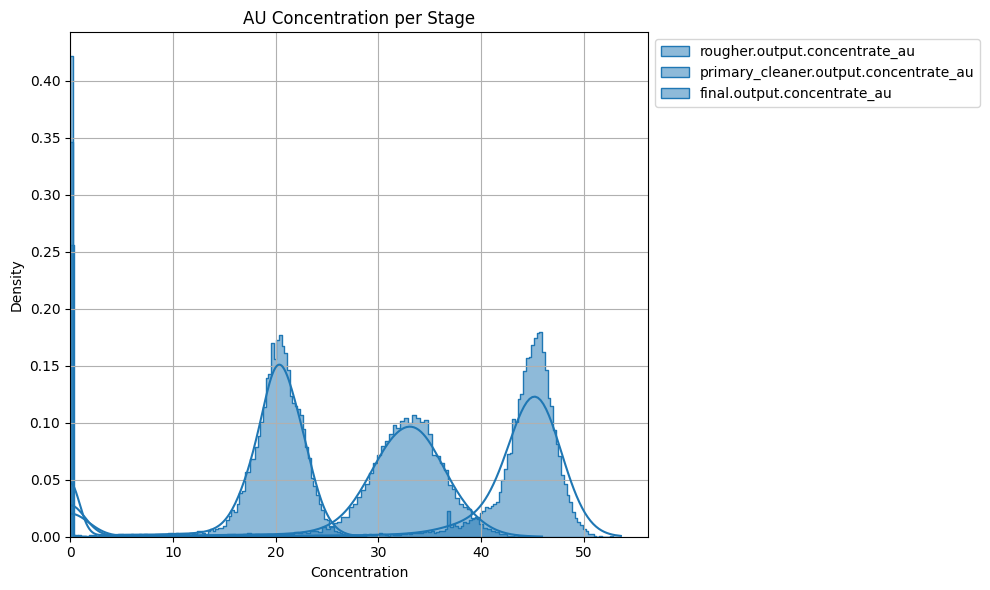

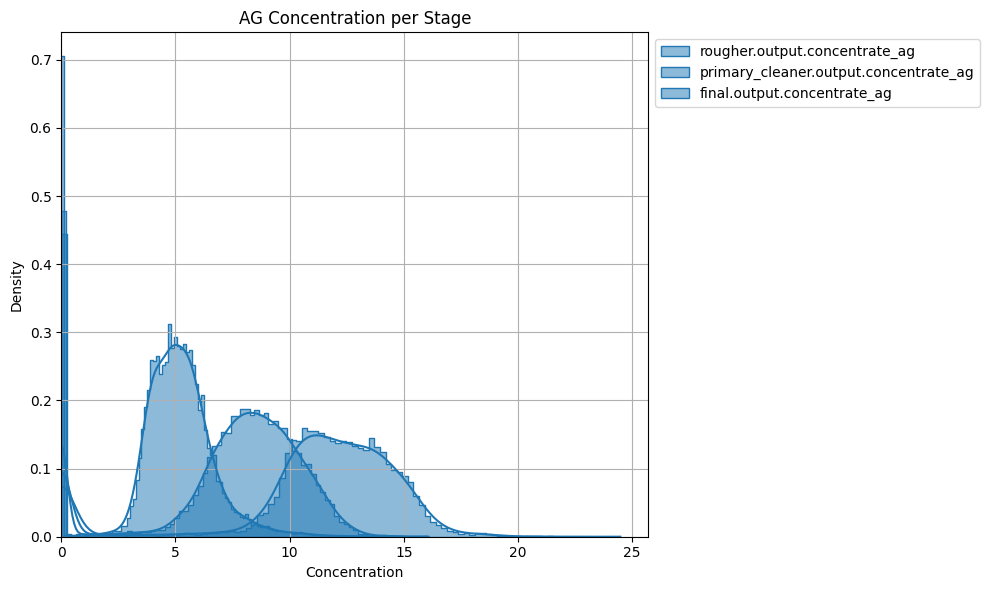

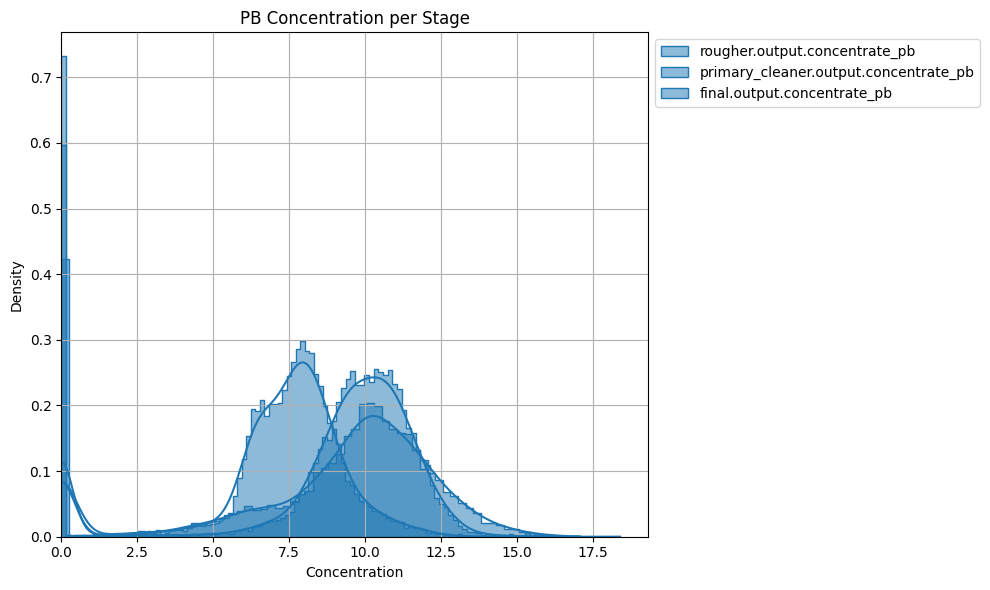

In [12]:
# Plot for each metal
plot_metal_concentration(full_data, metal_conc_cols, 'au')
plot_metal_concentration(full_data, metal_conc_cols, 'ag')
plot_metal_concentration(full_data, metal_conc_cols, 'pb')

plt.show()  # Show all plots at once

#### Observations

- The concentration of all metals increases as the material progresses through the stages, indicating effective enrichment.
    
- Gold (Au) has the most significant increase in concentration from the rougher to the final stage.
    
**Each stage seems to be progressively refining and concentrating the metals, particularly gold, effectively while maintaining clear distinctions between stages in terms of metal concentration.**

### Compare Particle Size Distributions



['rougher.input.feed_size', 'primary_cleaner.input.feed_size']


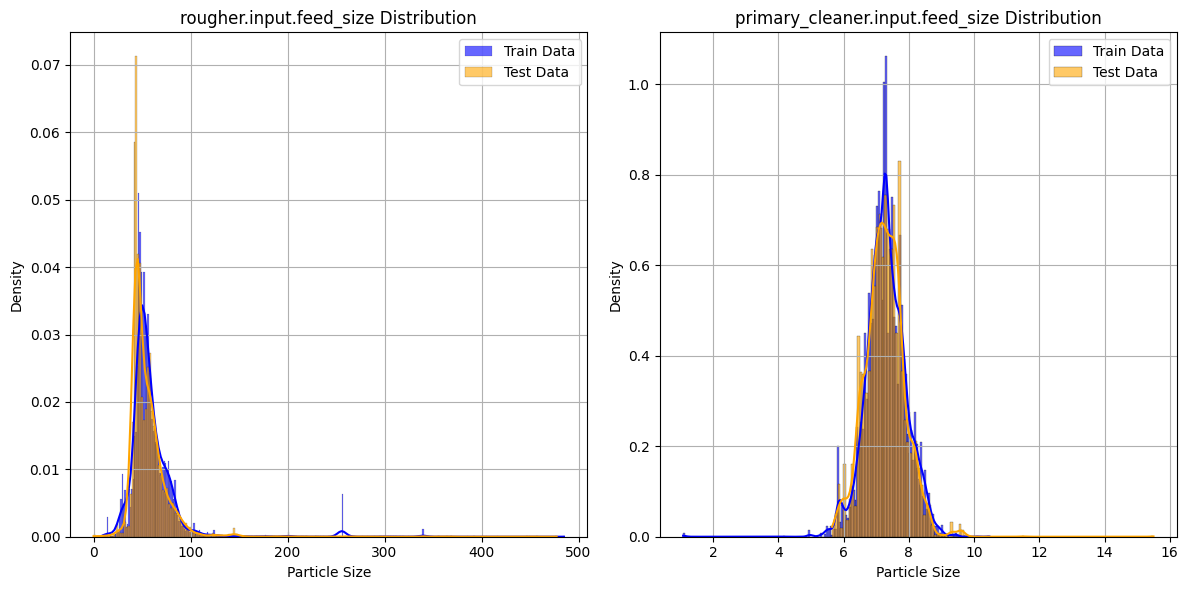

In [13]:
# Define the particle size columns
particle_size_cols = [col for col in full_data.columns if 'feed_size' in col]

# Reverse the order
particle_size_cols = particle_size_cols[::-1]

print(particle_size_cols)

# Compare Particle Size Distributions
def plot_particle_size_distribution(train_data, test_data, particle_size_cols):
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(particle_size_cols), figsize=(12, 6))

    # Loop through each particle size column and its corresponding axis
    for ax, col in zip(axes, particle_size_cols):
        # Plotting histogram for training data
        sns.histplot(train_data[col], kde=True, stat='density', label='Train Data', ax=ax, color='blue', alpha=0.6)

        # Plotting histogram for test data
        sns.histplot(test_data[col], kde=True, stat='density', label='Test Data', ax=ax, color='orange', alpha=0.6)

        # Set titles and labels
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel('Particle Size')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid()

    plt.tight_layout()  # Adjusts subplot parameters to give specified padding
    plt.show()

# Call the function with the correct columns
plot_particle_size_distribution(train_data, test_data, particle_size_cols)


#### Observation

- Both plots show a high degree of overlap between the training and test data, which suggests that the feature distributions between the two datasets are relatively consistent.
- In both cases, there is a long tail, but the bulk of the data is concentrated within a small range (0-100 for the rougher input feed size and 6-8 for the primary cleaner input feed size).

### Analyze Total Concentrations


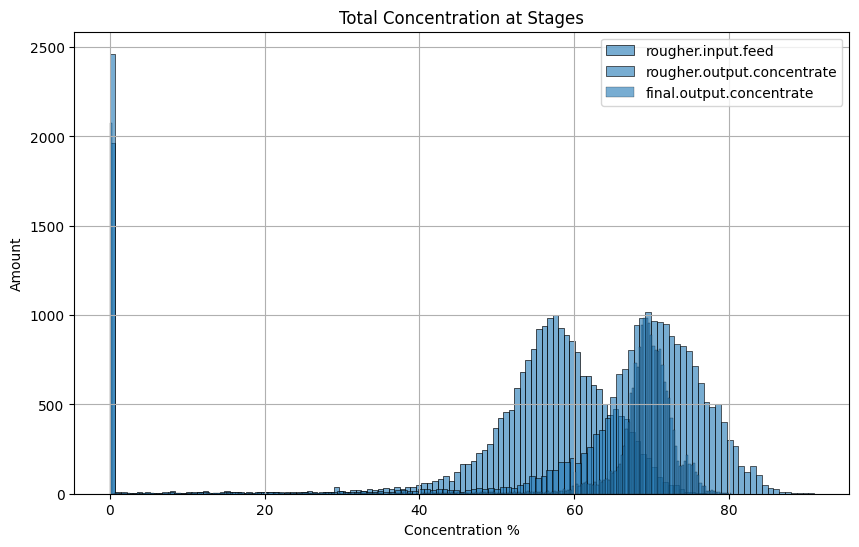

In [14]:
# Define the concentration summing functions
def raw_feed(df):
    return df["rougher.input.feed_au"] + df["rougher.input.feed_ag"] + df["rougher.input.feed_pb"] + df["rougher.input.feed_sol"]

def rougher_conc(df):
    return df["rougher.output.concentrate_au"] + df["rougher.output.concentrate_ag"] + df["rougher.output.concentrate_pb"] + df["rougher.output.concentrate_sol"]

def final_conc(df):
    return df["final.output.concentrate_au"] + df["final.output.concentrate_ag"] + df["final.output.concentrate_pb"] + df["final.output.concentrate_sol"]

# Updated plot function
def plot_total_concentration(data_full):
    # Calculate total concentration at each stage
    data_full["rougher.input.feed"] = raw_feed(data_full)
    data_full["rougher.output.concentrate"] = rougher_conc(data_full)
    data_full["final.output.concentrate"] = final_conc(data_full)
    
    # Create a DataFrame for plotting
    total_conc = data_full[["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]]
    
    # Plot the total concentration at each stage as overlapping histograms
    plt.figure(figsize=(10, 6))
    for column in total_conc.columns:
        sns.histplot(total_conc[column], kde=False, label=column, alpha=0.6)
    
    # Customize the plot
    plt.legend()
    plt.title('Total Concentration at Stages')
    plt.xlabel('Concentration %')
    plt.ylabel('Amount')
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Call the function to plot total concentration
plot_total_concentration(full_data)


#### Observation

- The graph show abnormal values near 0% concentration. 
    
- Will remove the near-zero values and possibly everything under 20% from both train and test data.

In [15]:
# Check if the required columns exist in train_data and test_data; if not, add them with NaN values
required_columns = [
    "rougher.output.concentrate_au", "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb", "rougher.output.concentrate_sol",
    "final.output.concentrate_au", "final.output.concentrate_ag", 
    "final.output.concentrate_pb", "final.output.concentrate_sol"
]

for col in required_columns:
    if col not in train_data.columns:
        train_data[col] = np.nan
    if col not in test_data.columns:
        test_data[col] = np.nan


In [16]:
# Check if the required columns exist in train_data and test_data; if not, add them with NaN values
required_columns = [
    "rougher.output.concentrate_au", "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb", "rougher.output.concentrate_sol",
    "final.output.concentrate_au", "final.output.concentrate_ag", 
    "final.output.concentrate_pb", "final.output.concentrate_sol"
]

for col in required_columns:
    if col not in train_data.columns:
        train_data[col] = np.nan
    if col not in test_data.columns:
        test_data[col] = np.nan


# Applying transformations and filtering to train_data
train_data["rougher.input.feed"] = raw_feed(train_data)
train_data["rougher.output.concentrate"] = rougher_conc(train_data)
train_data["final.output.concentrate"] = final_conc(train_data)

# Filter rows based on concentration thresholds
train_data = train_data[
    (train_data["rougher.input.feed"] > 20) &
    (train_data["rougher.output.concentrate"] > 20) &
    (train_data["final.output.concentrate"] > 20)
]

# Drop temporary columns
train_data = train_data.drop(["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"], axis=1)

# Applying transformations and filtering to test_data
test_data["rougher.input.feed"] = raw_feed(test_data)
test_data["rougher.output.concentrate"] = rougher_conc(test_data)
test_data["final.output.concentrate"] = final_conc(test_data)

# Filter rows based on concentration thresholds
test_data = test_data[
    (test_data["rougher.input.feed"] > 20) &
    (test_data["rougher.output.concentrate"] > 20) &
    (test_data["final.output.concentrate"] > 20)
]

In [18]:
# Define your target columns
target_cols = ['rougher.output.recovery', 'final.output.recovery']

# Drop temporary columns only if they exist in test_data
for col in ["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]:
    if col in test_data.columns:
        test_data = test_data.drop(col, axis=1)

# Ensure test_data columns match those in train_data
test_data = test_data.drop(list(full_data_merge.columns.values), axis=1, errors="ignore")
train_data = train_data.loc[:, list(test_data.columns)]

# Set Global Random Seed
state = np.random.RandomState(12345)

# Combine train and test for consistent feature extraction
full_data = pd.concat([train_data, test_data], ignore_index=True)

# Shuffle both datasets so they are not in chronological order
data_train = train_data.sample(frac=1, random_state=state).reset_index(drop=True)
data_test = test_data.sample(frac=1, random_state=state).reset_index(drop=True)

# Separate features and target variables for training
X_train = data_train.drop(target_cols, axis=1)
y_train_rougher = data_train['rougher.output.recovery']
y_train_final = data_train['final.output.recovery']

# Prepare the test data
X_test = data_test.drop(target_cols, axis=1)
y_test_rougher = data_test['rougher.output.recovery']
y_test_final = data_test['final.output.recovery']

# Ensure you use only features that are present in both train and test sets
common_cols = list(set(X_train.columns) & set(X_test.columns))
X_train = X_train[common_cols]
X_test = X_test[common_cols]

# Ensure only numeric columns are passed to the scaler
X_train_numeric = X_train.select_dtypes(include=[np.number])  # Select only numeric columns
X_test_numeric = X_test.select_dtypes(include=[np.number])  # Select only numeric columns

# Scale the features
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train_numeric)
X_test_scaled = feature_scaler.transform(X_test_numeric)


In [19]:
print(train_data.shape)
print(test_data.shape)

(14409, 54)
(5244, 54)


### Build the Model

In [20]:
# Define a custom sMAPE scorer
def smape(y_true, y_pred):
    return 100 * (abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)).mean()

smape_scorer = make_scorer(smape, greater_is_better=False)

# Define a function to train and evaluate models using sMAPE as the metric
def train_and_evaluate(X, y, scoring=smape_scorer):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(n_jobs=-1),
    }
    
    results = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, scoring=scoring, cv=5, n_jobs=-1)
        results[model_name] = -scores.mean()  # Store sMAPE as positive
    return results

# Tune hyperparameters for Random Forest and return the best estimator and best parameters
def tune_hyperparameters(X, y):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
    }
    rf = RandomForestRegressor(n_jobs=-1)
    grid_search = GridSearchCV(rf, param_grid, scoring=smape_scorer, cv=5, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_, grid_search.best_params_


In [42]:
# Train and evaluate models for rougher output recovery using scaled data
rougher_results_filtered = train_and_evaluate(X_train_scaled, y_train_rougher, scoring=smape_scorer)
print("Model Performance for Rougher Output Recovery (sMAPE) - Scaled Data:")
for model, score in rougher_results_filtered.items():
    print(f"{model}: {score:.4f}")

Model Performance for Rougher Output Recovery (sMAPE) - Scaled Data:
Linear Regression: 5.2291
Decision Tree: 4.1931
Random Forest: 3.1000


In [43]:
# Train and evaluate models for final output recovery using scaled data
final_results_filtered = train_and_evaluate(X_train_scaled, y_train_final, scoring=smape_scorer)
print("\nModel Performance for Final Output Recovery (sMAPE) - Scaled Data:")
for model, score in final_results_filtered.items():
    print(f"{model}: {score:.4f}")



Model Performance for Final Output Recovery (sMAPE) - Scaled Data:
Linear Regression: 8.4633
Decision Tree: 8.4703
Random Forest: 5.8650


In [44]:
# Select the best models based on sMAPE
best_rougher_model_name = min(rougher_results_filtered, key=rougher_results_filtered.get)
best_final_model_name = min(final_results_filtered, key=final_results_filtered.get)

print(f"\nBest Model for Rougher Output Recovery: {best_rougher_model_name} with sMAPE: {rougher_results_filtered[best_rougher_model_name]:.4f}")
print(f"Best Model for Final Output Recovery: {best_final_model_name} with sMAPE: {final_results_filtered[best_final_model_name]:.4f}")



Best Model for Rougher Output Recovery: Random Forest with sMAPE: 3.1000
Best Model for Final Output Recovery: Random Forest with sMAPE: 5.8650


In [24]:
"""
Train the best models
if best_rougher_model_name == 'Random Forest':
    best_rougher_model, best_rougher_params = tune_hyperparameters(X_train, y_train_rougher)
    print(f"Best hyperparameters for Rougher model: {best_rougher_params}")
else:
    best_rougher_model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train_rougher)

if best_final_model_name == 'Random Forest':
    best_final_model, best_final_params = tune_hyperparameters(X_train, y_train_final)
    print(f"Best hyperparameters for Final model: {best_final_params}")
else:
    best_final_model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train_final)
"""


'\nTrain the best models\nif best_rougher_model_name == \'Random Forest\':\n    best_rougher_model, best_rougher_params = tune_hyperparameters(X_train, y_train_rougher)\n    print(f"Best hyperparameters for Rougher model: {best_rougher_params}")\nelse:\n    best_rougher_model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train_rougher)\n\nif best_final_model_name == \'Random Forest\':\n    best_final_model, best_final_params = tune_hyperparameters(X_train, y_train_final)\n    print(f"Best hyperparameters for Final model: {best_final_params}")\nelse:\n    best_final_model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train_final)\n'

In [48]:
# Best hyperparameters from previous tuning since it takes over an hour to tune
rougher_best_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 2
}

final_best_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 2
}

# Train the best models using the saved best hyperparameters
if best_rougher_model_name == 'Random Forest':
    best_rougher_model = RandomForestRegressor(
        n_estimators=rougher_best_params['n_estimators'],
        max_depth=rougher_best_params['max_depth'],
        min_samples_split=rougher_best_params['min_samples_split'],
        n_jobs=-1
    ).fit(X_train_scaled, y_train_rougher)
else:
    best_rougher_model = RandomForestRegressor(n_jobs=-1).fit(X_train_scaled, y_train_rougher)

if best_final_model_name == 'Random Forest':
    best_final_model = RandomForestRegressor(
        n_estimators=final_best_params['n_estimators'],
        max_depth=final_best_params['max_depth'],
        min_samples_split=final_best_params['min_samples_split'],
        n_jobs=-1
    ).fit(X_train_scaled, y_train_final)
else:
    best_final_model = RandomForestRegressor(n_jobs=-1).fit(X_train_scaled, y_train_final)


In [49]:
# Make predictions
rougher_predictions = best_rougher_model.predict(X_test_scaled)
final_predictions = best_final_model.predict(X_test_scaled)

# Calculate the final sMAPE
rougher_smape_value = smape(y_test_rougher, rougher_predictions)
final_smape_value = smape(y_test_final, final_predictions)

# Combine final sMAPE calculation
final_smape = 0.25 * rougher_smape_value + 0.75 * final_smape_value
print(f"\nFinal sMAPE: {final_smape:.4f}")



Final sMAPE: 7.9142


In [50]:
# Sanity check with a constant model
dummy_model_rougher = DummyRegressor(strategy="mean").fit(X_train_scaled, y_train_rougher)
dummy_model_final = DummyRegressor(strategy="mean").fit(X_train_scaled, y_train_final)

dummy_rougher_predictions = dummy_model_rougher.predict(X_test_scaled)
dummy_final_predictions = dummy_model_final.predict(X_test_scaled)

dummy_rougher_smape = smape(y_test_rougher, dummy_rougher_predictions)
dummy_final_smape = smape(y_test_final, dummy_final_predictions)

dummy_final_smape_combined = 0.25 * dummy_rougher_smape + 0.75 * dummy_final_smape

print(f"Constant Model Final sMAPE: {dummy_final_smape_combined:.4f}")
assert final_smape < dummy_final_smape_combined, "The model should perform better than the constant model."


Constant Model Final sMAPE: 7.9496


### Conclusion

- The Final sMAPE for the Random Forest model is 7.9142%, indicating a slightly more accurate predictive capability compared to the constant model, which yielded a Final sMAPE of 7.9496%.

- Although the difference in sMAPE between the models is small, the Random Forest model does show a minor improvement, suggesting it captures some underlying patterns in the data that a naive prediction does not.

**In summary, the project has successfully built a predictive model for gold recovery rates, but with room for refinement. The current model provides a baseline for future enhancements and offers valuable insights for improving predictive accuracy in similar industrial processes.**